In [75]:
import numpy as np
import pandas as pd
 
import statsmodels.api as sm
from statistics import variance
 
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

import sys
import os

In [76]:
warnings.filterwarnings("ignore")

In [77]:
PASSENGERS_DATASET_PATH = './passengers.csv'
BIRTHS_DATASET_PATH = './births.csv'

In [78]:
df_passengers = pd.read_csv(PASSENGERS_DATASET_PATH)

df_passengers

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Задание 1

Посчитать по датасету passengers автокорреляционную функцию (acf) вручную (с помощью shift()) – от lag 1 до lag 50. Построить график для acf.

In [79]:
START_LAG = 1
END_LAG = 50

In [80]:
def autocorrelation(df, column, startLag, endLag):
  for lag_number in range(startLag, endLag + 1):
    df[f'lag_{lag_number}'] = df[column].shift(-lag_number)

In [81]:
autocorrelation(df_passengers, '#Passengers', START_LAG, END_LAG)

df_passengers

,Month,#Passengers,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50
0,1949-01,112,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,...,218.0,230.0,242.0,209.0,191.0,172.0,194.0,196.0,196.0,236.0
1,1949-02,118,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,...,230.0,242.0,209.0,191.0,172.0,194.0,196.0,196.0,236.0,235.0
2,1949-03,132,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,...,242.0,209.0,191.0,172.0,194.0,196.0,196.0,236.0,235.0,229.0
3,1949-04,129,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,...,209.0,191.0,172.0,194.0,196.0,196.0,236.0,235.0,229.0,243.0
4,1949-05,121,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,...,191.0,172.0,194.0,196.0,196.0,236.0,235.0,229.0,243.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08,606,508.0,461.0,390.0,432.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,1960-09,508,461.0,390.0,432.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,1960-10,461,390.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,1960-11,390,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


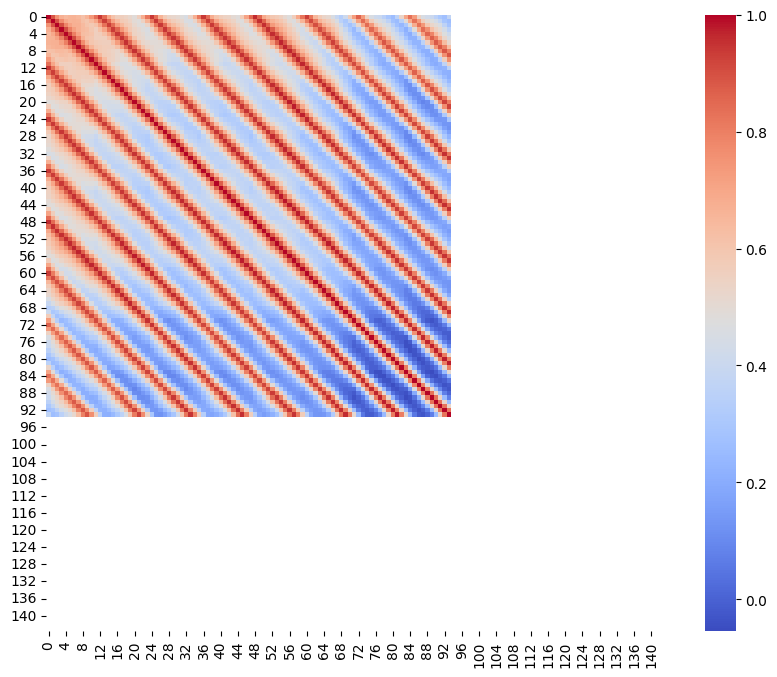

In [82]:
df_passengers_corr = df_passengers.drop(columns=['Month']).to_numpy()
passengers_corr = np.corrcoef(df_passengers_corr )

plt.figure(figsize=(10,8))
sns.heatmap(passengers_corr, cmap='coolwarm')
plt.show()

## Задание 2
Построить график для acf, используя фукции:

from statsmodels.grafics.tsaplots import plot_acf

plot_acf(passengers)

Сравнить график с графиком из задания 1.

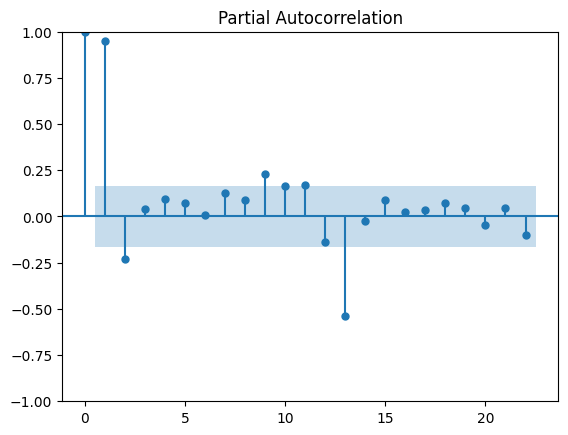

In [83]:
acf_passengers = sm.graphics.tsa.plot_pacf(df_passengers["#Passengers"])

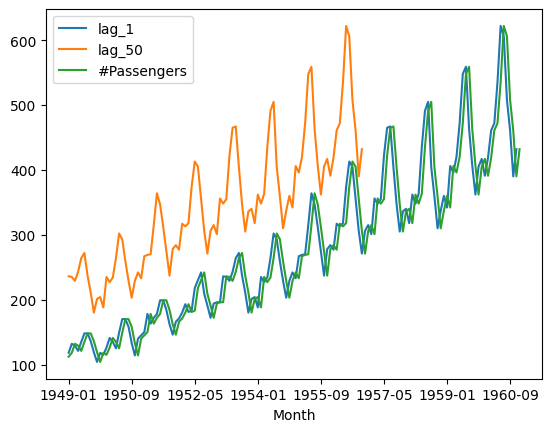

In [84]:
df_passengers.plot(x = "Month", y = ["lag_1", "lag_50", "#Passengers"])

plt.show()

## Задание 3

Сделать то же, что и в заданиях 1, 2 на датасете births.

In [85]:
df_births = pd.read_csv(BIRTHS_DATASET_PATH)

df_births

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [86]:
autocorrelation(df_births, 'Births', START_LAG, END_LAG)

df_births

,Date,Births,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50
0,1959-01-01,35,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,...,36.0,45.0,51.0,34.0,52.0,47.0,45.0,46.0,39.0,48.0
1,1959-01-02,32,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,...,45.0,51.0,34.0,52.0,47.0,45.0,46.0,39.0,48.0,37.0
2,1959-01-03,30,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,...,51.0,34.0,52.0,47.0,45.0,46.0,39.0,48.0,37.0,35.0
3,1959-01-04,31,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,...,34.0,52.0,47.0,45.0,46.0,39.0,48.0,37.0,35.0,52.0
4,1959-01-05,44,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,...,52.0,47.0,45.0,46.0,39.0,48.0,37.0,35.0,52.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,52.0,48.0,55.0,50.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,1959-12-28,52,48.0,55.0,50.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,1959-12-29,48,55.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,1959-12-30,55,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


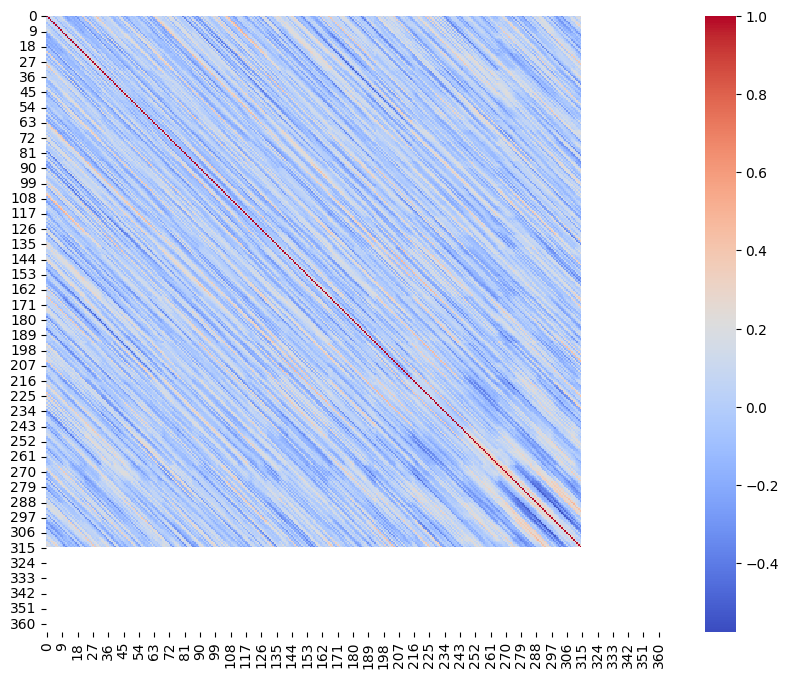

In [87]:
df_births_corr = df_births.drop(columns=['Date']).to_numpy()
births_corr = np.corrcoef(df_births_corr )

plt.figure(figsize=(10,8))
sns.heatmap(births_corr, cmap='coolwarm')
plt.show()

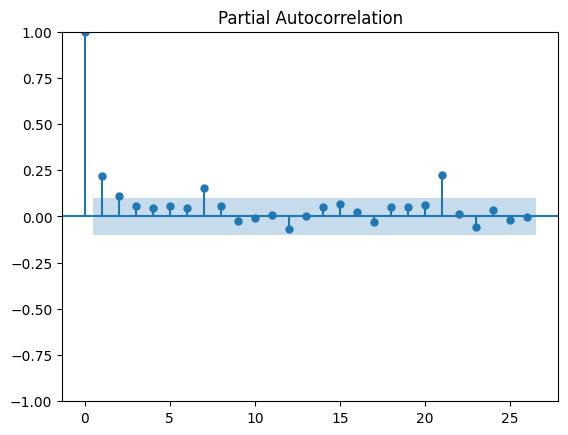

In [88]:
acf_births = sm.graphics.tsa.plot_pacf(df_births["Births"])

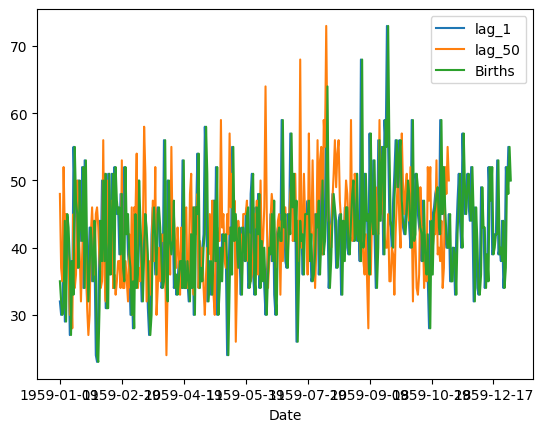

In [89]:
df_births.plot(x = "Date", y = ["lag_1", "lag_50", "Births"])

plt.show()

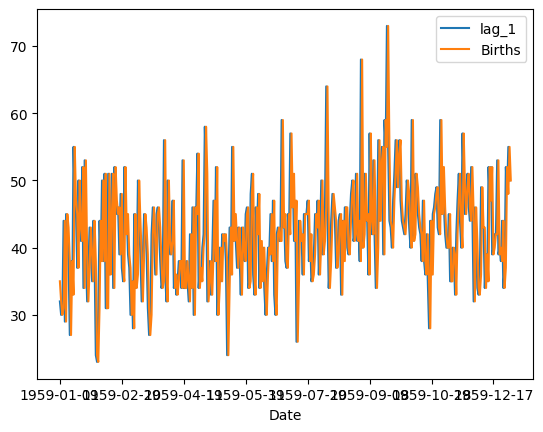

In [90]:
df_births.plot(x = "Date", y = ["lag_1", "Births"])

plt.show()

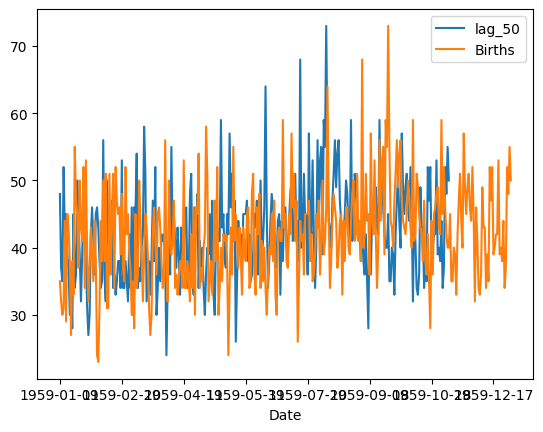

In [91]:
df_births.plot(x = "Date", y = ["lag_50", "Births"])

plt.show()

## Задание 4

Построить значения функции sin x на отрезке [0, 50] с интервалом 0,1. 

Сделать то же, что и в заданиях 1, 2, использовать 100 лагов. Посмотреть на значение acf.

In [92]:
days = [lag_number for lag_number in range(0, END_LAG + 1)]
sinValues = [np.sin(lag_number) for lag_number in range(0, END_LAG + 1)]
data = {'day': days, 'sin': sinValues}

df_sin = pd.DataFrame(data)

df_sin.head(5)

,day,sin
0,0,0.000000
1,1,0.841471
2,2,0.909297
3,3,0.141120
4,4,-0.756802


In [93]:
autocorrelation(df_sin, 'sin', START_LAG, 100 + 1)

df_sin

,day,sin,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100,lag_101
0,0,0.000000,0.841471,0.909297,0.141120,-0.756802,-0.958924,-0.279415,0.656987,0.989358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.841471,0.909297,0.141120,-0.756802,-0.958924,-0.279415,0.656987,0.989358,0.412118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.909297,0.141120,-0.756802,-0.958924,-0.279415,0.656987,0.989358,0.412118,-0.544021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.141120,-0.756802,-0.958924,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-0.756802,-0.958924,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990,-0.536573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,-0.958924,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990,-0.536573,0.420167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990,-0.536573,0.420167,0.990607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,0.656987,0.989358,0.412118,-0.544021,-0.999990,-0.536573,0.420167,0.990607,0.650288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,0.989358,0.412118,-0.544021,-0.999990,-0.536573,0.420167,0.990607,0.650288,-0.287903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0.412118,-0.544021,-0.999990,-0.536573,0.420167,0.990607,0.650288,-0.287903,-0.961397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


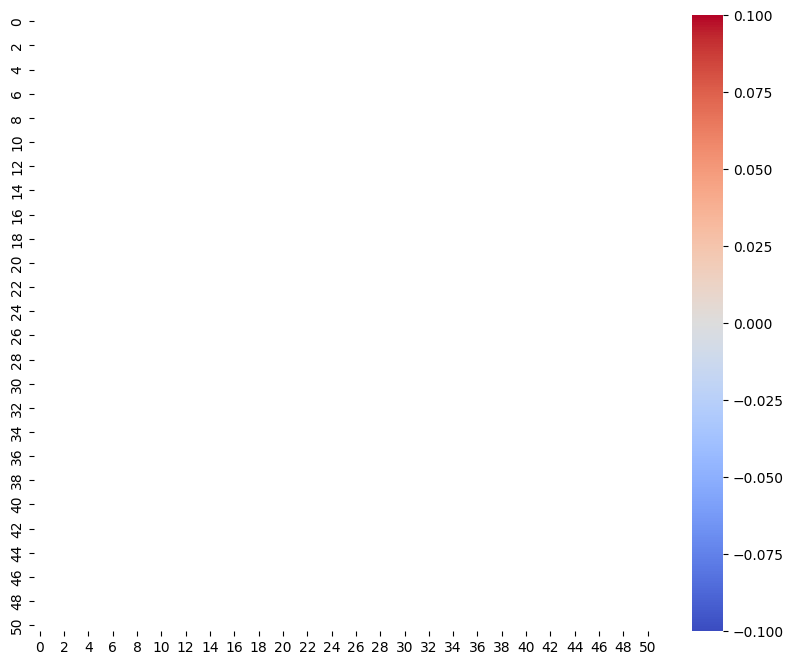

In [94]:
df_sin_corr = df_sin.drop(columns=['day']).to_numpy()
sin_corr = np.corrcoef(df_sin_corr )

plt.figure(figsize=(10,8))
sns.heatmap(sin_corr, cmap='coolwarm')
plt.show()

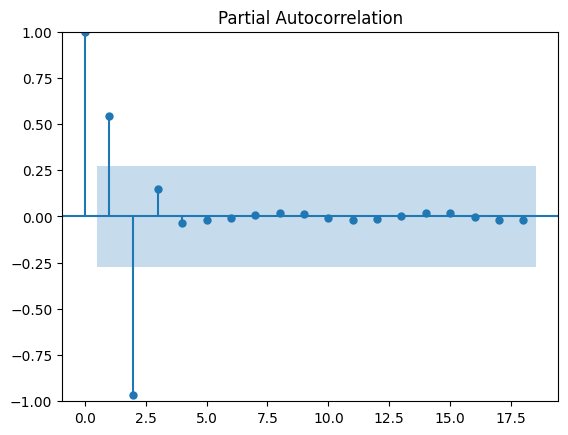

In [95]:
acf_sin = sm.graphics.tsa.plot_pacf(df_sin["sin"])

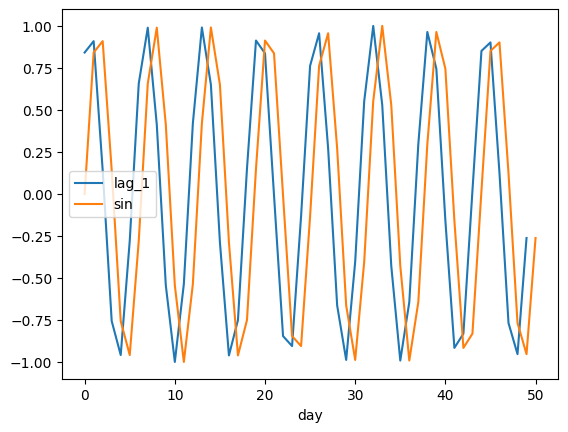

In [96]:
df_sin.plot(x = "day", y = ["lag_1", "sin"])
plt.show()

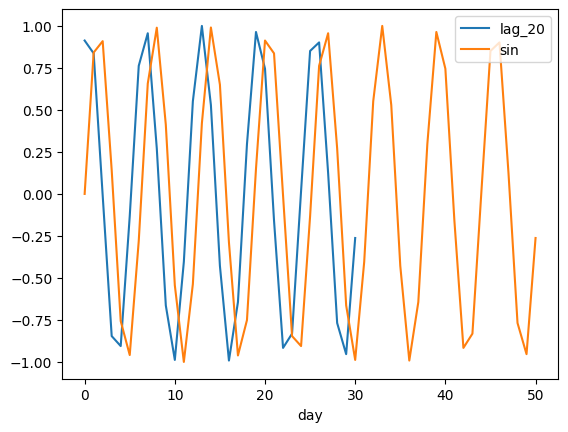

In [97]:
df_sin.plot(x = "day", y = ["lag_20", "sin"])
plt.show()

## Задание 5

(задание на повторение) Исследовать датасет births на стационарность – провести тест Дики-Фуллера (как в ЛР4).

In [98]:
df_births = df_births[['Date', 'Births']]

df_births

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [99]:
def check_stationary(x, alpha=0.05):
    test_stat, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(x)
    is_stationary = False

    if p_value < alpha:
        is_stationary = True
      
    return {
        'p_value': p_value,
        'is_stationary': is_stationary
    }
    
def print_stationary(stationary_data):
    p_value = stationary_data['p_value']
    is_stationary = stationary_data['is_stationary']
  
    if is_stationary:
        print(f'Выборка является стационарной, значение p-value = {p_value} ')
        return

    print(f'Выборка не является стационарной, значение p-value = {p_value} ')
    
def print_full_test(noise, alpha=0.05):
  print_stationary(check_stationary(noise, alpha=alpha))
  print('Тест Дики Фуллера', sm.tsa.stattools.adfuller(noise))
  

In [103]:
def stat_df(df, column):
  mean = round(df[column].mean(), 3)
  variance_computed = variance(df[column])
  
  return {
    'mean': mean,
    'variance': variance_computed
  }

In [101]:
print_full_test(df_births['Births'])

Выборка является стационарной, значение p-value = 5.2434129901498554e-05 
Тест Дики Фуллера (-4.808291253559764, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)


In [104]:
stat_df(df_births, 'Births')

{'mean': 41.981, 'variance': 53.99688393797983}